# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

api_key=weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
#save configuration information
url="http://api.openweathermap.org/data/2.5/weather?"
units="metrics"

#build partial query url
query_url = f"{url}appid={api_key}&units={units}&q="

In [34]:
query_url+"wladyslawowo"

'http://api.openweathermap.org/data/2.5/weather?appid=7aba2508fe9c532a8511baad00e2e129&units=metrics&q=wladyslawowo'

In [35]:
#call the url for a response
response = requests.get(query_url + city).json()
# set up the list to hold the latitude and temperature information
print(response['coord']['lat'])
#All the printing statements...etc

59.7


In [37]:
# len(lat)

In [38]:
weather_data

,city,lat,lon,Max_temp,Humidity,cloudiness,wind Speed,Country,date
0,nome,64.50,-165.41,262.15,85,1,3.43,US,1604176942
1,lima,-12.04,-77.03,292.59,77,75,4.60,PE,1604177074
2,sioux lookout,50.10,-91.92,277.15,88,90,5.70,CA,1604177138
3,pevek,69.70,170.31,262.76,96,62,5.35,RU,1604177139
4,kalianget,-7.05,113.93,297.10,88,100,1.64,ID,1604177139
5,bluff,-46.60,168.33,287.04,66,96,3.13,NZ,1604177139
6,muncar,-8.43,114.33,297.33,75,85,1.37,ID,1604177139
7,krasnoselkup,65.70,82.47,272.54,98,100,9.31,RU,1604177139
8,pozhva,59.09,56.08,274.66,95,100,5.20,RU,1604177139
9,quatre cocos,-20.21,57.76,292.15,82,40,2.60,MU,1604177139


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# NORMAL PANDAS WORK STARTS - start working with the pandas.. dont use APIS

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
# #Parse the JSON and retrieve data
# city_weather = requests.get(query_url+ city).json()

# # set up the list to hold the city information
# city_data=[]

# try:
#     # Parse the JSON and retrieve data
#     #city_weather = requests.get(query_url + city).json()
 
#     # Parse out the max temp, humidity, and cloudiness
    
#     lat = city_weather["coord"]["lat"]
#     lng = city_weather["coord"]["lon"]
#     max_temp = city_weather["main"]["temp_max"]
#     humidity = city_weather["main"]["humidity"]
#     clouds = city_weather["clouds"]["all"]
#     wind = city_weather["wind"]["speed"]
#     country = city_weather["sys"]["country"]
#     date = city_weather["dt"]
    
#     # Append the City information into city_data list
#     city_data.append({"City": city,
#                   "Lat": lat,
#                   "Lng": lng,
#                   "Max Temp": max_temp,
#                   "Humidity": humidity,
#                   "Cloudiness":clouds,
#                   "Wind Speed": wind,
#                   "Country": country,
#                   "Date": date})
# except:
#       # Append null values
#         #city.append(None)
#         #country.append(None)
#         #latitude.append(None)
#         #longitude.append(None)
#         #weather_date.append(None)
#         #temp.append(None)
#         #humidity.append(None)
#         #cloudiness.append(None)
#         #wind_speed.append(None)
#         pass
        

In [41]:
City=pd.DataFrame(city_data)
city

NameError: name 'city_data' is not defined

In [ ]:
weather_data.head()

In [ ]:
# weather_data.loc[ <specify th rows or by the index> < where you specify the condition for the rows to be sliced>,<names of colums> ]
# weather_data.loc[weather_data["Humidity"]>80 ,: ]
# weather_data.loc[weather_data["Max_temp"]>250,["city","lat"]]
weather_data.loc[(weather_data["Humidity"]>75) & (weather_data["cloudiness"]<50) ,["city","lat"]]

In [ ]:
#Using .loc & .iloc
#groupby & agg

In [44]:
# Get the indices of cities that have humidity over 100%.
weather_data.loc[weather_data["Humidity"]>=100 ,: ]

,city,lat,lon,Max_temp,Humidity,cloudiness,wind Speed,Country,date


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [42]:
weather_data.to_csv(r"C:\Users\joseph\Python Homework-APIs\Instructions\apidata.csv")


In [43]:
weather_data.to_csv(r"C:\Users\joseph\Python Homework-APIs\Instructions\starter_code\apidata.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [54]:
data = pd.read_csv('../starter_code/apidata.csv')
data

,Unnamed: 0,city,lat,lon,Max_temp,Humidity,cloudiness,wind Speed,Country,date
0,0,nome,64.50,-165.41,262.15,85,1,3.43,US,1604176942
1,1,lima,-12.04,-77.03,292.59,77,75,4.60,PE,1604177074
2,2,sioux lookout,50.10,-91.92,277.15,88,90,5.70,CA,1604177138
3,3,pevek,69.70,170.31,262.76,96,62,5.35,RU,1604177139
4,4,kalianget,-7.05,113.93,297.10,88,100,1.64,ID,1604177139
5,5,bluff,-46.60,168.33,287.04,66,96,3.13,NZ,1604177139
6,6,muncar,-8.43,114.33,297.33,75,85,1.37,ID,1604177139
7,7,krasnoselkup,65.70,82.47,272.54,98,100,9.31,RU,1604177139
8,8,pozhva,59.09,56.08,274.66,95,100,5.20,RU,1604177139
9,9,quatre cocos,-20.21,57.76,292.15,82,40,2.60,MU,1604177139


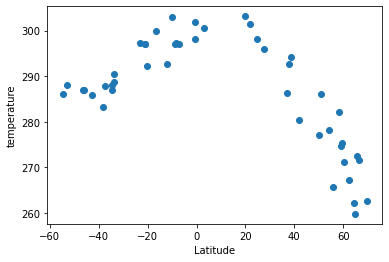

In [56]:
#latitude vs. Temperature scatter plot
#latitude vs. Temperature scatter plot
# Create a Scatter Plot for temperature vs latitude
x_values = data['lat']
y_values = data['Max_temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('temperature')
plt.show()

In [75]:
# # Perform a linear regression on temperature vs. latitude
# (slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)

# # Get regression values
# regress_values = x_values * slope + intercept
# print(regress_values)

# # Create line equation string
# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# # Create Plot
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# plt.xlabel('Latitude')
# plt.ylabel('Temperature')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# # Print r value
# print(f"The r-value is: {rvalue**2}")


y = 0.02x +4.5
The r-value is: 0.07522053442658627


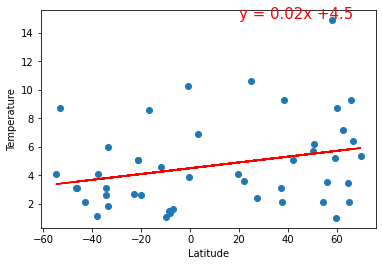

## Latitude vs. Humidity Plot

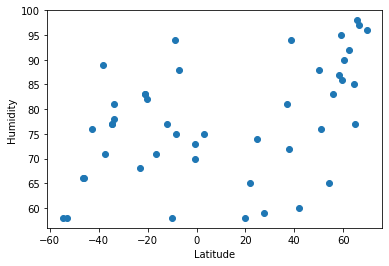

In [58]:
# Create a Scatter Plot for temperature vs latitude
#latitude vs. Temperature scatter plot
# Create a Scatter Plot for temperature vs latitude
x_values = data['lat']
y_values = data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [ ]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

## Latitude vs. Cloudiness Plot

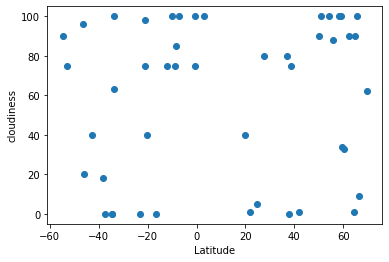

In [59]:
# Create a Scatter Plot for temperature vs latitude
#latitude vs. Temperature scatter plot
# Create a Scatter Plot for temperature vs latitude
x_values = data['lat']
y_values = data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.show()


In [ ]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

## Latitude vs. Wind Speed Plot

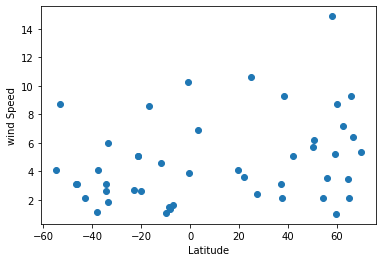

In [60]:
# Create a Scatter Plot for temperature vs latitude
#latitude vs. Temperature scatter plot
# Create a Scatter Plot for temperature vs latitude
x_values = data['lat']
y_values = data['wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('wind Speed')
plt.show()

## Linear Regression

In [ ]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression